##### Noor Haj Dawood - 314997602

##### Bader Daka - 208219212

# setup

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

In [ ]:
sns.set_theme(style="darkgrid")


In [ ]:
mobiles = pd.read_csv('mobile_price_1.csv', index_col='id')
mobiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   m_dep          2000 non-null   float64
 2   mobile_wt      2000 non-null   int64  
 3   px_height      2000 non-null   int64  
 4   px_width       2000 non-null   int64  
 5   ram            2000 non-null   int64  
 6   sc_h           2000 non-null   int64  
 7   sc_w           2000 non-null   int64  
 8   talk_time      2000 non-null   int64  
 9   bluetooth      2000 non-null   object 
 10  gen            2000 non-null   int64  
 11  cores          2000 non-null   object 
 12  speed          2000 non-null   object 
 13  sim            2000 non-null   object 
 14  f_camera       1526 non-null   float64
 15  camera         1899 non-null   float64
 16  memory         2000 non-null   int64  
 17  screen         2000 non-null   object 
 18  wifi    

In [ ]:
mobiles['camera'].fillna(0, inplace=True)
mobiles['f_camera'].fillna(0, inplace=True)

convert categorical features to categorical

In [ ]:
speeds = ['low', 'medium', 'high']
mobiles['speed'] = pd.Categorical(mobiles['speed'], categories=speeds, ordered=True)

screens = ['Touch', 'LCD']
mobiles['screen'] = pd.Categorical(mobiles['screen'], categories=screens, ordered=False)

cores=['single', 'dual', 'triple', 'quad', 'penta', 'hexa', 'hepta', 'octa']
mobiles['cores'] = pd.Categorical(mobiles['cores'], categories=cores, ordered=True)

bluetooth=['No', 'Yes']
mobiles['bluetooth'] = pd.Categorical(mobiles['bluetooth'], categories=bluetooth, ordered=False)

sim=['Single', 'Dual']
mobiles['sim'] = pd.Categorical(mobiles['sim'], categories=sim, ordered=True)

wifi=['none', 'b', 'a', 'g', 'n']
mobiles['wifi'] = pd.Categorical(mobiles['wifi'], categories=wifi, ordered=True)

gen=[2, 3, 4]
mobiles['gen'] = pd.Categorical(mobiles['gen'], categories=gen, ordered=True)

# Task 1

## `1. Plot a correlation heatmap of the data set and include it.`

In [ ]:
df = mobiles.select_dtypes(np.number)
corrMatrix = df.corr()
print(corrMatrix)

               battery_power     m_dep  mobile_wt  ...    camera    memory     price
battery_power       1.000000  0.034085   0.001844  ...  0.031441 -0.004050  0.312008
m_dep               0.034085  1.000000   0.021756  ...  0.026282  0.007279  0.017016
mobile_wt           0.001844  0.021756   1.000000  ...  0.018844 -0.034244 -0.001698
px_height           0.014901  0.025263   0.000939  ... -0.018465  0.010466  0.188167
px_width           -0.008402  0.023566   0.000090  ...  0.004196 -0.007975  0.156633
ram                -0.000653 -0.009434  -0.002581  ...  0.028984  0.032710  0.578441
sc_h               -0.029959 -0.025348  -0.033855  ...  0.004938  0.038025  0.009211
sc_w               -0.021421 -0.018388  -0.020761  ... -0.023819  0.012079  0.032647
talk_time           0.052510  0.017003   0.006209  ...  0.014657 -0.002850  0.011005
f_camera            0.033334 -0.001791   0.023618  ...  0.644595 -0.029139  0.008760
camera              0.031441  0.026282   0.018844  ...  1.000000 

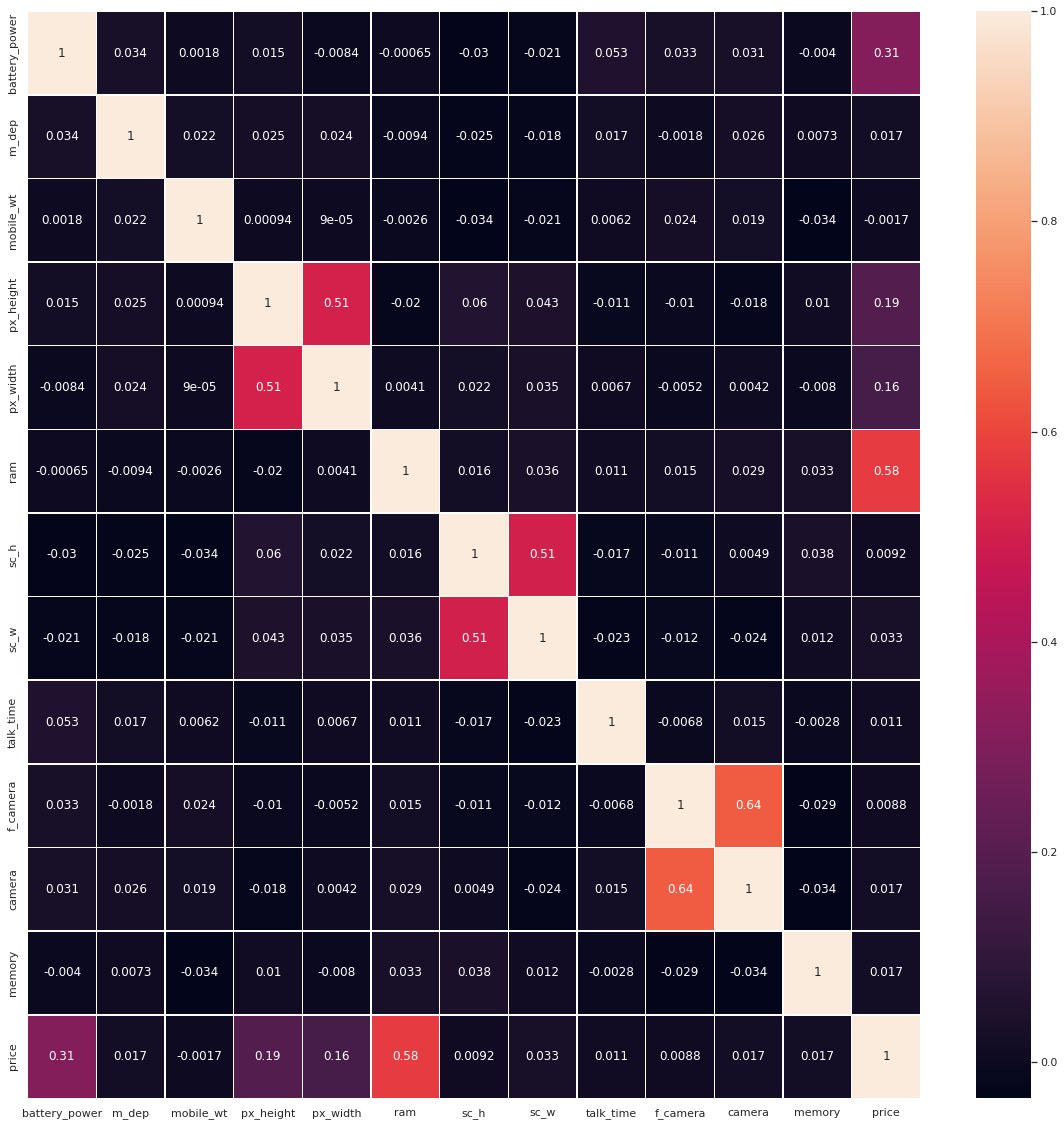

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corrMatrix, annot=True, linewidth=.5, ax=ax)
plt.show()

## `2. Which features would you say are correlated with the device price?`

We can see that all feature have less than 0.5 correlation value except for ram which has 0.58. Therefore:

      ram has a correlation to the price with a value of 0.58.

## `3. Are there features not shown in the correlation matrix that are correlated with the price? If so, what are they?`

if we do a box plot for each categorical feature (since they don't show in the heatmap), we can see how the price is affected for each categorical feature.

we can see that `wifi` and `gen` have a positive correlation with the price.

        1- As the wifi generation is higher, the higher the price. Where 'g' and 'n' have about the same prices.
        2- The higher gen a phone has the higher the price

In [ ]:
def boxplots_sameFeature(df, features, y_feature):
  """
  draw boxplot for each x=feature in features for y=y_feature in data=df
  """
  plt.figure(figsize=[25, 25])
  index=1
  for feature in features:
     plt.subplot(4, 4, index)
     sns.boxplot(y=y_feature, x=feature, data=df )
     index+=1

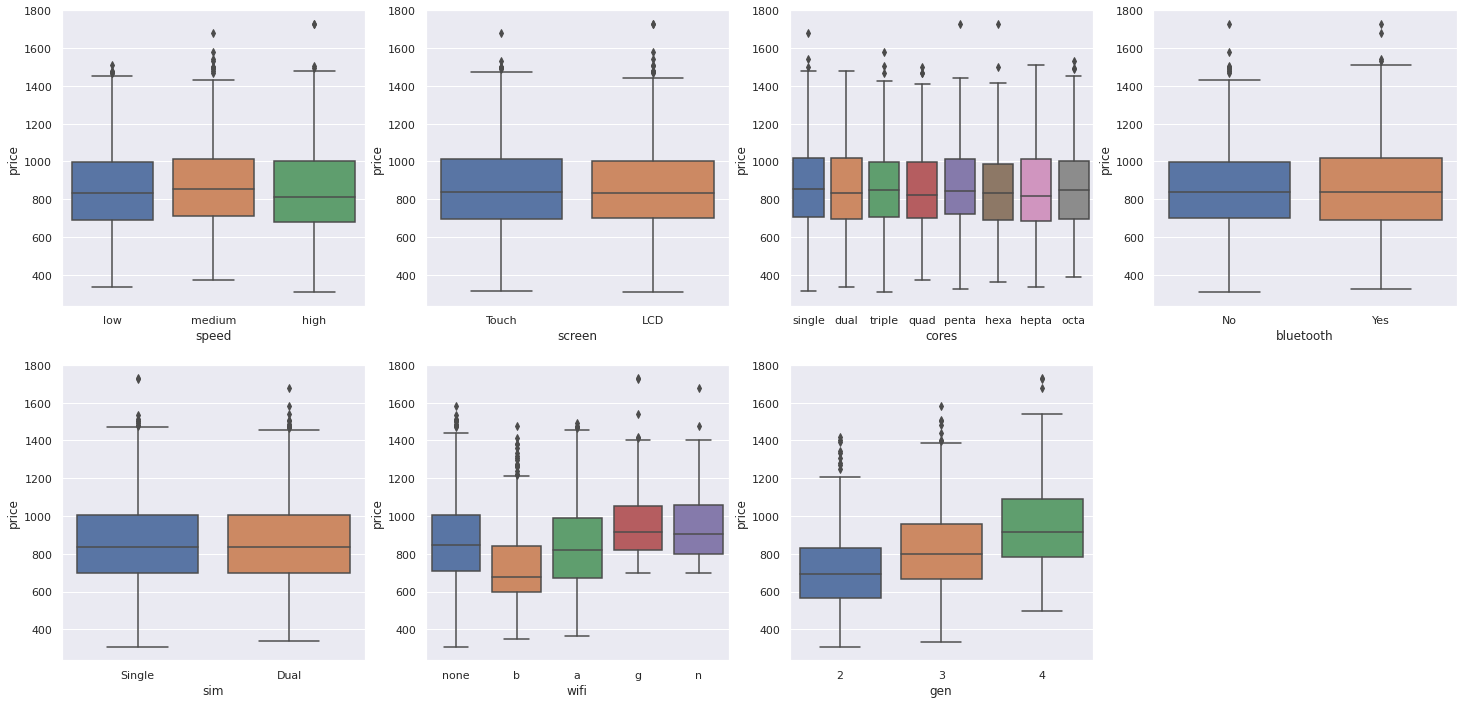

In [ ]:
features = ['speed', 'screen', 'cores', 'bluetooth', 'sim', 'wifi', 'gen']
boxplots_sameFeature(mobiles, features, 'price')

## `4. For each feature correlated with the price, plot its relationship with price`

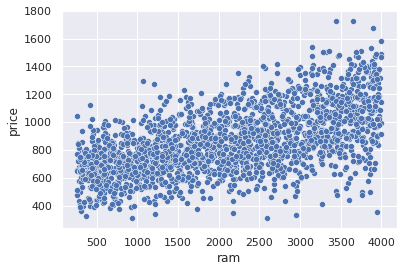

In [ ]:
sns.scatterplot(data=mobiles, x="ram", y="price")

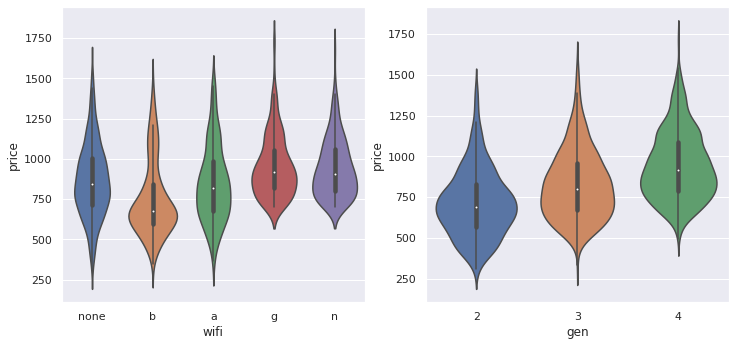

In [ ]:
plt.figure(figsize=[25, 25])

plt.subplot(4, 4, 1)
sns.violinplot(x='wifi', y='price', data=mobiles)

plt.subplot(4, 4, 2)
sns.violinplot(x='gen', y='price', data=mobiles)

# Task 2

## `1. For each ordinal feature \<O\>, add a column to the dataframe which holds the ordered values representing each original value of F. This new column will be named \<O\>_ord. (without the triangle brackets)`

In [ ]:
cores_dict = {'single': 1, 'dual': 2, 'triple': 3, 'quad': 4, 'penta': 5, 'hexa': 6, 'hepta': 7, 'octa': 8}
mobiles['cores_ord'] = mobiles['cores'].replace(cores_dict)

speed_dict = {'low': 1, 'medium': 2, 'high': 3}
mobiles['speed_ord'] = mobiles['speed'].replace(speed_dict)

sim_dict = {'Single': 1, 'Dual': 2}
mobiles['sim_ord'] = mobiles['sim'].replace(sim_dict)

wifi_dict = {'none': 1, 'b': 2, 'a': 3, 'g': 4, 'n': 5}
mobiles['wifi_ord'] = mobiles['wifi'].replace(wifi_dict)

mobiles['gen_ord'] = mobiles['gen'].astype('int64')


## `2. For each nominal feature \<N\>, add a binary column OR one-hot encoding (whichever is relevant for that feature) to the dataframe representing the original values. Name binary columns <N>_bin, and prefix one-hot encodings with \<N\>. (without the triangle brackets)`

In [ ]:
screen_dict = {'LCD': 0, 'Touch': 1}
mobiles['screen_bin'] = mobiles['screen'].replace(screen_dict)

bluetooth_dict = {'No': 0, 'Yes': 1}
mobiles['bluetooth_bin'] = mobiles['bluetooth'].replace(bluetooth_dict)

## `3. Plot a correlation heatmap of the modified data set and include it.`

In [ ]:
df = mobiles.select_dtypes(np.number)
corrMatrix = df.corr()
print(corrMatrix)

               battery_power     m_dep  ...  screen_bin  bluetooth_bin
battery_power       1.000000  0.034085  ...   -0.010516       0.011252
m_dep               0.034085  1.000000  ...   -0.002638       0.004049
mobile_wt           0.001844  0.021756  ...   -0.014368      -0.008605
px_height           0.014901  0.025263  ...    0.021891      -0.006872
px_width           -0.008402  0.023566  ...   -0.001628      -0.041533
ram                -0.000653 -0.009434  ...   -0.030455       0.026351
sc_h               -0.029959 -0.025348  ...   -0.020023      -0.002952
sc_w               -0.021421 -0.018388  ...    0.012720       0.000613
talk_time           0.052510  0.017003  ...    0.017196       0.013934
f_camera            0.033334 -0.001791  ...   -0.014828       0.003593
camera              0.031441  0.026282  ...   -0.008742      -0.009952
memory             -0.004050  0.007279  ...   -0.027202       0.041300
price               0.312008  0.017016  ...    0.005611       0.009795
cores_

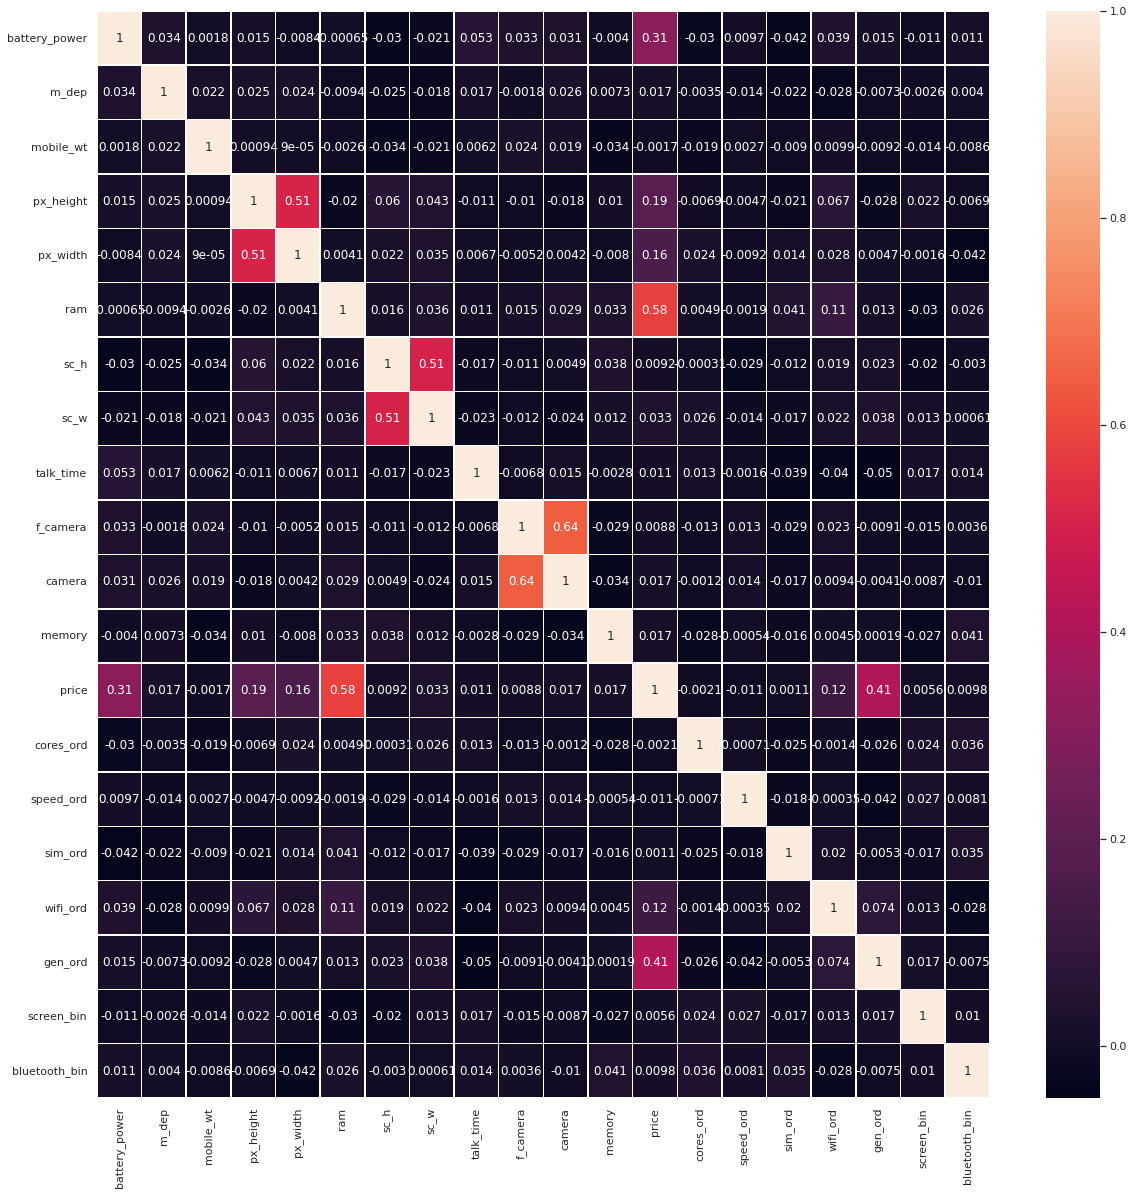

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corrMatrix, annot=True, linewidth=.5, ax=ax)
plt.show()

## `4. Save the entire dataframe to a csv file named “mobile_prices_converted.csv” and include it in the submission. Make sure you don’t add a redundant index column.`


In [ ]:
mobiles.to_csv('mobile_prices_converted.csv', sep=',')

# Task 3

## `1. Choose 4 features and use a 2-d plot to show the relationships between each pair. This should be done in the form of a 4x4 plot matrix as shown in class.`


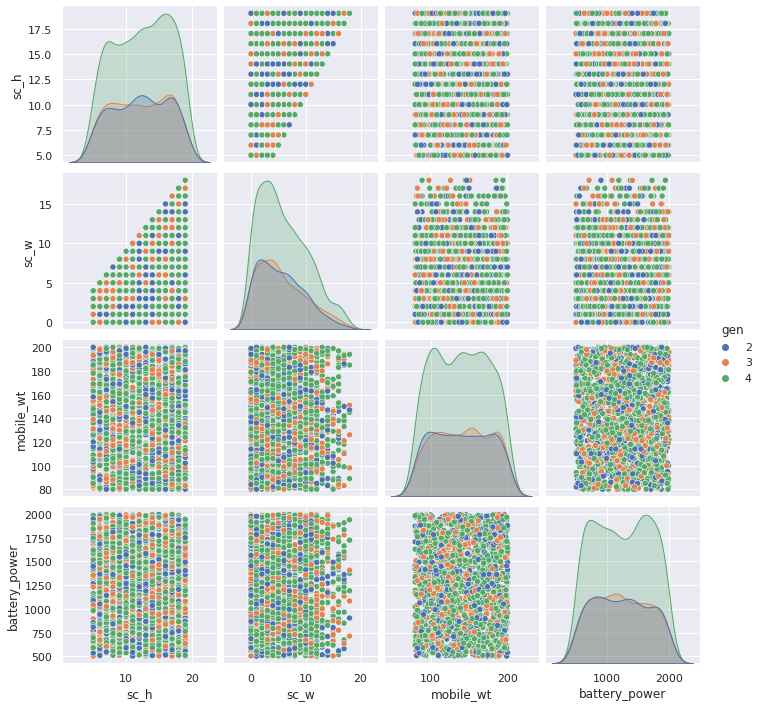

In [ ]:
df = mobiles[['sc_h', 'sc_w', 'mobile_wt', 'battery_power', 'gen']]
sns.pairplot(df,hue='gen')
plt.show()

## `2. We have shown in class how to plot 4 dimensions of data in a 2-dimensional plot. Use this method to plot the relationship between px_width, px_height, price and core. Px_width and px_height should be the X and Y coordinates respectively.`



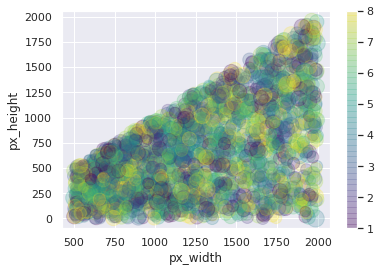

In [ ]:
plt.scatter(mobiles['px_width'], mobiles['px_height'], alpha=0.2,
            s=mobiles['price']/5, c=mobiles['cores_ord'], cmap='viridis')
plt.xlabel('px_width')
plt.ylabel('px_height')
plt.colorbar()

## `3. There is an additional file named “mobile_prices_2.csv” distributed alongside the exercise. This file contains a mapping of id to price. This price is a transformation of the price in the original data set. The transformation has been made based on a single feature from the data set. Which feature was used and how do you know? Include any relevant plots and tables.`

`price_2` was dervied and calculated using the feature `camera`. Explanation:

First, we'll take a look at how the `price_2` is distributed against the original `price`.

We see that the higher values are less, and the lower values are more.

In [ ]:
mobiles2 = pd.read_csv('mobile_price_2.csv', index_col='id')

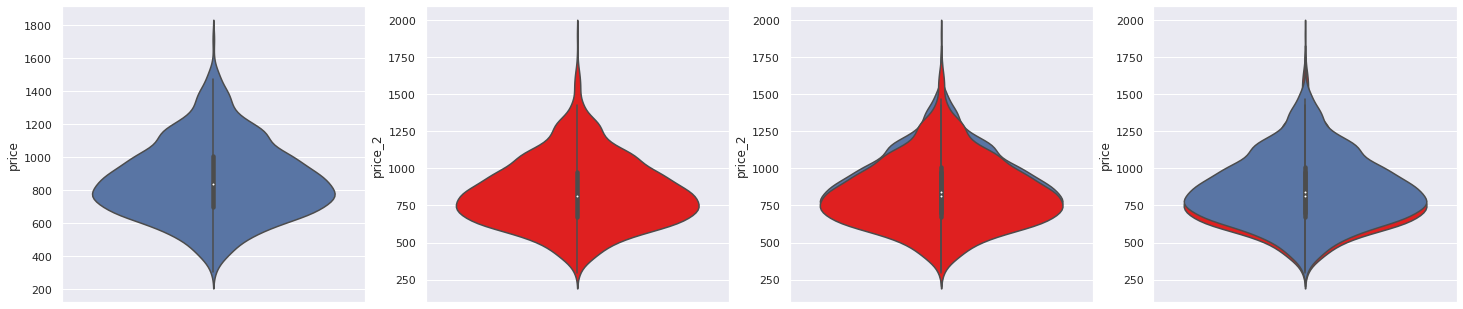

In [ ]:
plt.figure(figsize=[25, 25])

plt.subplot(4, 4, 1)
sns.violinplot(y='price', data=mobiles)

plt.subplot(4, 4, 2)
sns.violinplot(y='price_2', data=mobiles2, color='red')

plt.subplot(4, 4, 3)
sns.violinplot(y='price', data=mobiles)
sns.violinplot(y='price_2', data=mobiles2, color='red')

plt.subplot(4, 4, 4)
sns.violinplot(y='price_2', data=mobiles2, color='red')
sns.violinplot(y='price', data=mobiles)

Second, we'll look at the ratio of `price_2` against `price`.

We can see that either that the price goes up by 10% or down by 5%.

In [ ]:
mobiles3 = mobiles.copy()
mobiles3['price_2'] = mobiles2['price_2']

In [ ]:
mobiles3['price_relation'] = mobiles3['price_2'] / mobiles3['price']

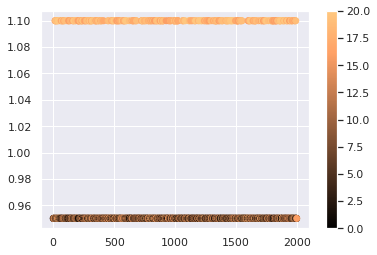

In [ ]:
plt.scatter(data=mobiles3, x=mobiles3.index , y='price_relation', c=mobiles3['camera'], cmap="copper")
plt.colorbar()

Third, we'll look at the description of the dataframe, where we compare the min/mean/25%/50%/75% of each feature, once for `price_2` is bigger than `price` and once for `price_2` is lower than `price` (we can see that there's no instances where price hasn't changed).

We discover that `camera` has the most drastic change, so we assume that this is the feature which was used to calculate `price_2`.

In [ ]:
len(mobiles3[mobiles3['price'] == mobiles3['price_2']])

0

In [ ]:
mobiles3[mobiles3['price'] < mobiles3['price_2']].describe()

,battery_power,m_dep,mobile_wt,px_height,px_width,ram,sc_h,sc_w,talk_time,f_camera,camera,memory,price,cores_ord,speed_ord,sim_ord,wifi_ord,gen_ord,screen_bin,bluetooth_bin,price_2,price_relation
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,1256.825279,0.505204,137.680297,630.962825,1235.583643,2285.040892,12.401487,5.598513,11.565056,7.847584,18.156134,31346.494424,885.111747,4.665428,1.966543,1.509294,2.223048,3.278810,0.501859,0.472119,973.622974,1.100000
std,443.541315,0.294684,35.614882,438.037447,428.875053,1078.816949,4.375406,4.782056,5.505801,5.069940,1.439634,17021.686749,250.639927,2.227615,0.759760,0.500845,1.396447,0.796656,0.500929,0.500153,275.703982,0.000003
min,501.000000,0.100000,80.000000,3.000000,512.000000,282.000000,5.000000,0.000000,2.000000,0.000000,16.000000,2344.000000,347.030000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,381.730000,1.099991
25%,850.000000,0.200000,105.000000,284.000000,878.000000,1352.000000,9.000000,1.000000,7.000000,4.000000,17.000000,16545.000000,714.390000,3.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,785.830000,1.099997
50%,1262.000000,0.500000,136.000000,564.000000,1226.000000,2394.000000,13.000000,4.000000,12.000000,8.000000,18.000000,31017.000000,860.290000,5.000000,2.000000,2.000000,2.000000,3.000000,1.000000,0.000000,946.320000,1.100000
75%,1633.000000,0.800000,169.000000,888.000000,1607.000000,3215.000000,16.000000,9.000000,16.000000,12.000000,20.000000,45520.000000,1027.770000,7.000000,3.000000,2.000000,3.000000,4.000000,1.000000,1.000000,1130.550000,1.100003
max,1995.000000,1.000000,200.000000,1899.000000,1997.000000,3991.000000,19.000000,18.000000,20.000000,18.000000,20.000000,64504.000000,1728.970000,8.000000,3.000000,2.000000,5.000000,4.000000,1.000000,1.000000,1901.870000,1.100008


In [ ]:
mobiles3[mobiles3['price'] > mobiles3['price_2']].describe()

,battery_power,m_dep,mobile_wt,px_height,px_width,ram,sc_h,sc_w,talk_time,f_camera,camera,memory,price,cores_ord,speed_ord,sim_ord,wifi_ord,gen_ord,screen_bin,bluetooth_bin,price_2,price_relation
count,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000
mean,1235.673599,0.501213,140.648180,647.306181,1253.991334,2099.220104,12.291739,5.793183,10.924899,3.759676,8.636049,32732.704217,858.436534,4.497978,1.905835,1.509532,2.135182,3.283651,0.503177,0.498556,815.514552,0.950000
std,438.834587,0.287512,35.359677,444.751476,432.784222,1083.817042,4.188594,4.287363,5.453971,3.943094,5.475046,18329.837117,226.799793,2.296862,0.757105,0.500054,1.360544,0.829279,0.500134,0.500142,215.459825,0.000004
min,502.000000,0.100000,80.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,1954.000000,307.110000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,291.750000,0.949985
25%,852.000000,0.200000,109.000000,282.500000,874.500000,1180.500000,9.000000,2.000000,6.000000,0.000000,4.000000,16318.500000,695.020000,2.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,660.270000,0.949997
50%,1225.000000,0.500000,141.000000,564.000000,1249.000000,2086.000000,12.000000,5.000000,11.000000,3.000000,9.000000,32493.000000,834.240000,4.000000,2.000000,2.000000,2.000000,4.000000,1.000000,0.000000,792.530000,0.950000
75%,1614.500000,0.800000,170.000000,953.500000,1638.500000,3033.000000,16.000000,9.000000,16.000000,6.000000,13.000000,48609.000000,1005.715000,7.000000,2.000000,2.000000,3.000000,4.000000,1.000000,1.000000,955.430000,0.950003
max,1998.000000,1.000000,200.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,19.000000,20.000000,64922.000000,1726.870000,8.000000,3.000000,2.000000,5.000000,4.000000,1.000000,1.000000,1640.530000,0.950012


if we look at the violin plots, where the price after chnage is drawin in **red**, we can see that `price_2` where the camera has a value equal or greater to 16 is higher, and if the value is less than 16 then `price_2` is lower.

This matches the behavior of `price_2` overall against `price`, therefore we can safely conclude that `camera` was actually the feature that is used to calculate `price_2`.

In [ ]:
mobiles3['camera_high'] = mobiles3['camera'] >= 16.0

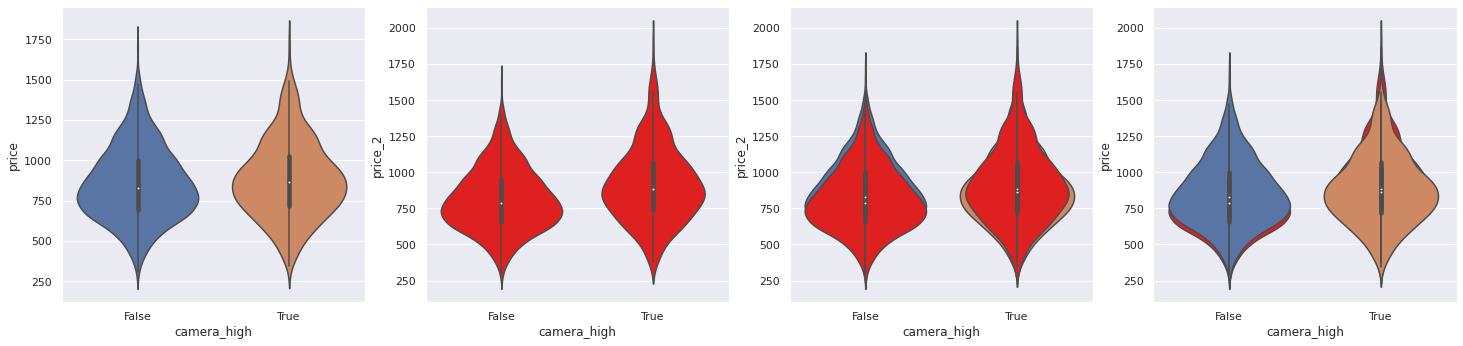

In [ ]:
plt.figure(figsize=[25, 25])

plt.subplot(4, 4, 1)
sns.violinplot(x='camera_high', y='price', data=mobiles3)

plt.subplot(4, 4, 2)
sns.violinplot(x='camera_high', y='price_2', data=mobiles3, color='red')

plt.subplot(4, 4, 3)
sns.violinplot(x='camera_high', y='price', data=mobiles3)
sns.violinplot(x='camera_high', y='price_2', data=mobiles3, color='red')

plt.subplot(4, 4, 4)
sns.violinplot(x='camera_high', y='price_2', data=mobiles3, color='red')
sns.violinplot(x='camera_high', y='price', data=mobiles3)

# Task 4

## `1. In Task 3 question 3 you were asked to find the feature on which the transformation of price into price_2 was made. You must now find that exact manner in which this transformation was done. Analyze the data and present the algorithm used when transforming price into price_2.`

In [ ]:
mobiles3['new_price'] = mobiles3.apply(lambda x: round(x['price']*1.10,2) if x['camera_high'] else round(x['price']*0.95,2), axis=1)
mobiles3['new_price1'] = mobiles3.apply(lambda x: x['price']*1.10 if x['camera_high']  else x['price']*0.95, axis=1)